# Assignment 1

In [1]:
# read the csv file
import pandas as pd
hitters = pd.read_csv('Hitters.csv')
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [2]:
# choose numeric predictors and salary
h = hitters.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis = 1)
h.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [3]:
# delete the NAN salary rows
h = h.dropna(axis=0,how='any')
h.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


## Lasso Regression

In [4]:
# seperate predictors and salary
predictors = list(h.columns)
predictors.remove('Salary')
x = h[predictors]
y = h['Salary']

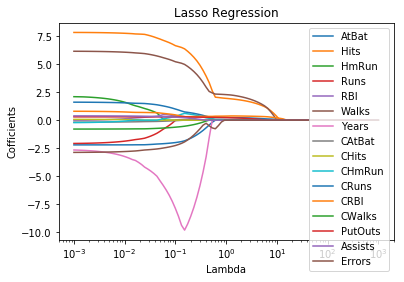

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,LassoCV
# get a list of lambda values
lambdas = np.logspace(-3,3,100)
lasso_coefficients = []

for l in lambdas:
    lasso = Lasso(alpha = l, normalize=True, max_iter=10000)
    lasso.fit(x, y)
    lasso_coefficients.append(lasso.coef_)

# visualization of the coefficient trajectories
plt.plot(lambdas, lasso_coefficients)
plt.xscale('log')
plt.axis('tight')
plt.title('Lasso Regression')
plt.xlabel('Lambda')
plt.ylabel('Cofficients')
plt.legend(predictors)
plt.show()

In [7]:
l = np.logspace(0.5, 1.5, 5)
coef_matrix_lasso = pd.DataFrame(index=l, columns=predictors)
for i in range(len(l)):
    lasso = Lasso(alpha = l[i], normalize=True, max_iter=10000)
    lasso.fit(x, y)
    coef_matrix_lasso.iloc[i,] = lasso.coef_
coef_matrix_lasso

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
3.162278,0,1.6025,0,0,0,1.83109,0,0,0,0,0.187628,0.351957,0,0.131474,0,-0
5.623413,0,1.22049,0,0,0,1.29889,0,0,0,0,0.127254,0.318299,0,0.0266021,0,-0
10.000000,0,0.329475,0,0,0,0,0,0,0,0,0.076322,0.204475,0,0,0,0
17.782794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0
31.622777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0


Hits, CRuns and CRBI are the final three predictors that remain in the model.

In [8]:
# do a 10 fold Lasso CV
lasso_cv = LassoCV(alphas = lambdas, normalize=True, cv = 10, max_iter=10000)
lasso_cv.fit(x, y)
# optimal value of the regularization penality
lasso_best = lasso_cv.alpha_
lasso_best

0.06579332246575682

In [9]:
# fit in the optimal lambda
lasso = Lasso(alpha = lasso_best, normalize=True, max_iter=10000)
lasso.fit(x, y)
# list the coefficients
lasso.coef_

array([-2.07759715,  7.01624238,  0.        , -0.64178781,  0.48984811,
        5.49292505, -6.21540982, -0.08457041,  0.        ,  0.16758899,
        1.21346673,  0.57699971, -0.6865474 ,  0.29253023,  0.30221006,
       -2.43903508])

14 predictors are left in the model.

## Ridge Regression

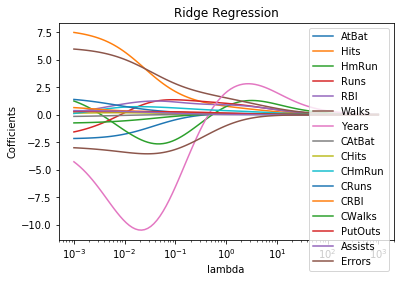

In [10]:
from sklearn.linear_model import Ridge,RidgeCV
ridge_cofficients = []

for l in lambdas:
    ridge = Ridge(alpha = l, normalize=True)
    ridge.fit(x, y)
    ridge_cofficients.append(ridge.coef_)

# visualization of the coefficient trajectories
plt.plot(lambdas, ridge_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title('Ridge Regression')
plt.xlabel('lambda')
plt.ylabel('Cofficients')
plt.legend(predictors)
plt.show()

In [11]:
# do a 10 fold Ridge CV
ridge_cv = RidgeCV(alphas = lambdas, normalize=True, cv = 10)
ridge_cv.fit(x, y)
# optimal value of the regularization penality
ridge_best = ridge_cv.alpha_
ridge_best

C:\Users\minyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9326033468832199

## Short Answer

Bias-variance tradeoff: between lower bias and lower variance, youcan just choose one. If you get lower bias, you will get higher variance, and vice versa.
When the regularization becomes bigger, the bias will become higher, and then the variance become lower. Thus, the regularization can control the prediction, making it suitable instead of overfitting or too high bias.
We can see from the table in Lasso Regression that when lambda becomes bigger, more and more coefficients becomes 0, which will finally make the prediction becomes constant with high bias and low variance. But this is obviously not the best model, thus regularization helps make a balance between bias and variance